In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(0)

df = pd.read_csv('final2014.csv')

In [2]:
years = [2015, 2016, 2017, 2018]

for year in years:
    frame = pd.read_csv('final{}.csv'.format(year))
    frames = [df, frame]
    df = pd.concat(frames)

/Users/flatiron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48208 entries, 0 to 9681
Data columns (total 20 columns):
Unnamed: 0          48208 non-null int64
Unnamed: 0.1        38675 non-null float64
acousticness        48208 non-null float64
artist_name         48208 non-null object
danceability        48208 non-null float64
duration_ms         48208 non-null int64
energy              48208 non-null float64
instrumentalness    48208 non-null float64
key                 48208 non-null int64
liveness            48208 non-null float64
loudness            48208 non-null float64
mode                48208 non-null int64
popularity          48208 non-null int64
release_date        48208 non-null object
speechiness         48208 non-null float64
tempo               48208 non-null float64
time_signature      48208 non-null int64
track_id            48208 non-null object
track_name          48208 non-null object
valence             48208 non-null float64
dtypes: float64(10), int64(6), object(4)
memory 

In [4]:
df.drop_duplicates(subset=['artist_name','track_name'], inplace=True)

In [5]:
df.shape

(47602, 20)

In [6]:
df['year'] = df['release_date'].map(lambda x: x[:4])
df['month'] = df['release_date'].map(lambda x: x[5:7])
df = df[df.month != '']
print(df.shape)
df.head(2)

(47291, 22)


,Unnamed: 0,Unnamed: 0.1,acousticness,artist_name,danceability,duration_ms,energy,instrumentalness,key,liveness,...,popularity,release_date,speechiness,tempo,time_signature,track_id,track_name,valence,year,month
0,0,NaN,0.302,J. Cole,0.696,292987,0.521,0.0,10,0.0565,...,83,2014-12-09,0.3320,100.000,4,62vpWI1CHwFy7tMIcSStl8,No Role Modelz,0.458,2014,12
1,1,NaN,0.431,Vance Joy,0.484,204280,0.731,0.0,1,0.1510,...,79,2014-09-09,0.0379,101.654,4,3JvrhDOgAt6p7K8mDyZwRd,Riptide,0.510,2014,09


In [7]:
df['year'] = df.year.astype(int, inplace=True)
df['month'] = df.month.astype(int, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47291 entries, 0 to 9681
Data columns (total 22 columns):
Unnamed: 0          47291 non-null int64
Unnamed: 0.1        37947 non-null float64
acousticness        47291 non-null float64
artist_name         47291 non-null object
danceability        47291 non-null float64
duration_ms         47291 non-null int64
energy              47291 non-null float64
instrumentalness    47291 non-null float64
key                 47291 non-null int64
liveness            47291 non-null float64
loudness            47291 non-null float64
mode                47291 non-null int64
popularity          47291 non-null int64
release_date        47291 non-null object
speechiness         47291 non-null float64
tempo               47291 non-null float64
time_signature      47291 non-null int64
track_id            47291 non-null object
track_name          47291 non-null object
valence             47291 non-null float64
year                47291 non-null int64
month  

In [8]:
columns = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 
           'key', 'liveness', 'loudness','speechiness', 'tempo', 'valence']

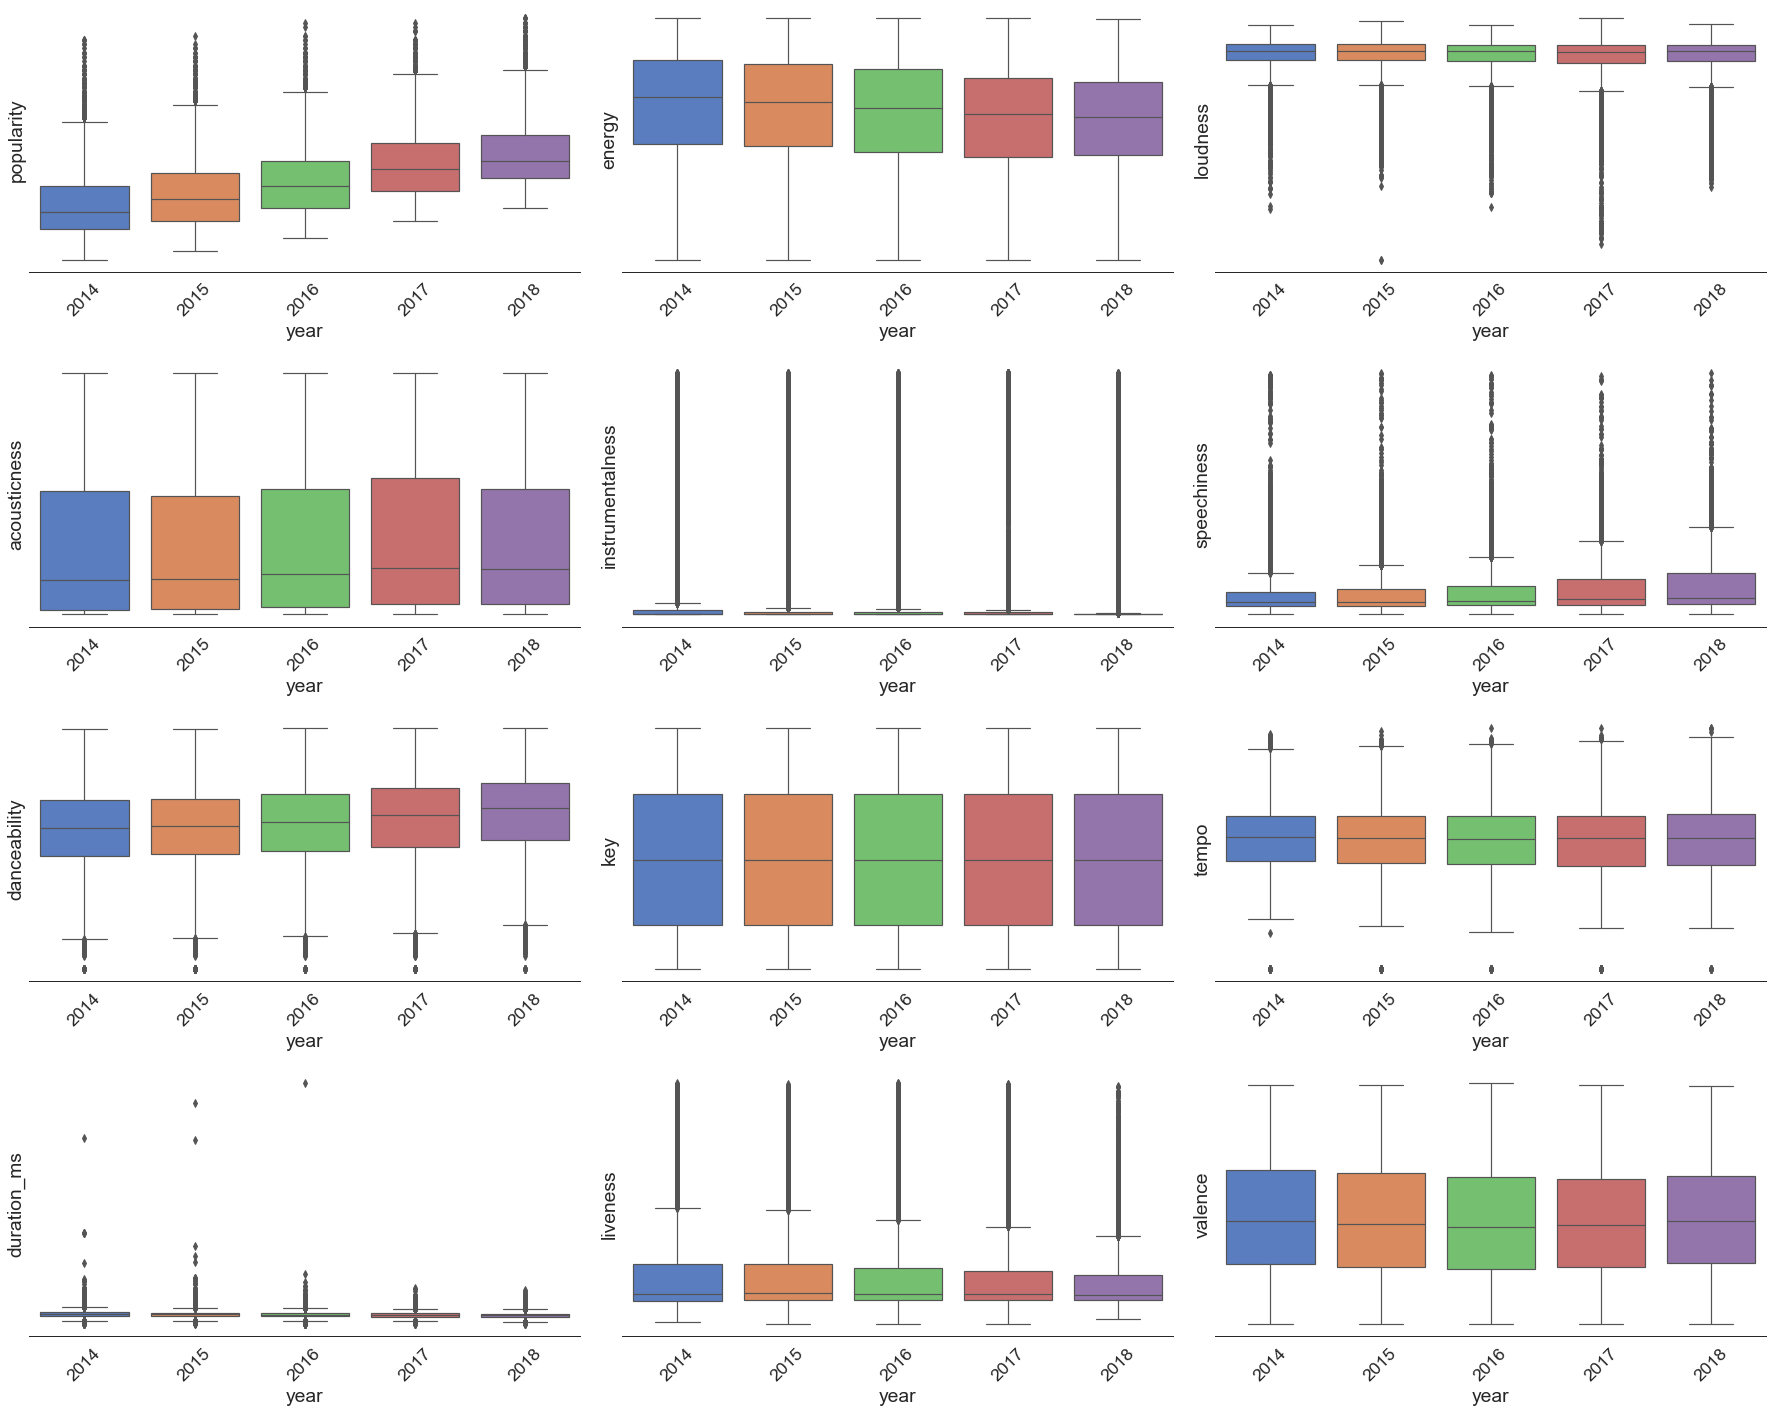

In [9]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("paper", font_scale=2.0)


# Set up the matplotlib figure
f, axes = plt.subplots(4,3, figsize=(25, 20))
sns.despine(left=True)

i = 0

for col in range(0,3):
    for row in range(0,4):
        name = columns[i]
        sns.boxplot(x=df['year'],y=df[name], ax=axes[row, col])
        ax = axes[row,col]
        ax.tick_params(labelrotation=45)
        i += 1 
        
        
plt.setp(axes, yticks=[])
plt.tight_layout()

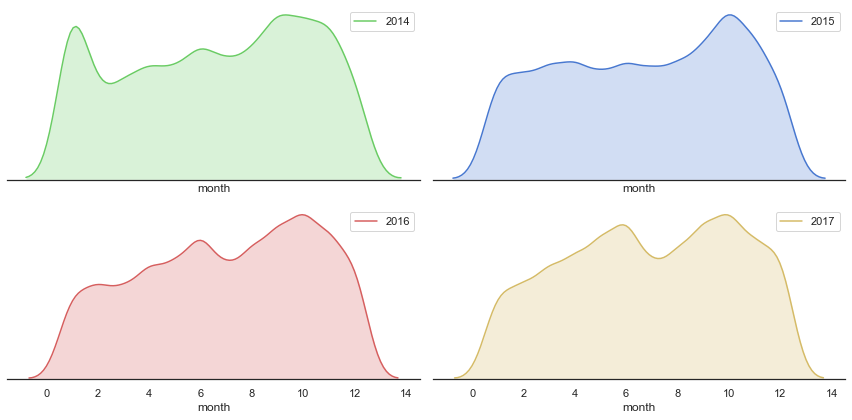

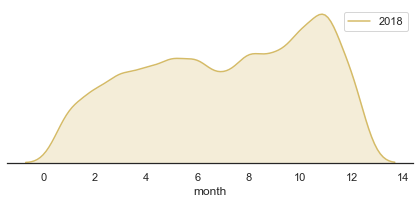

In [11]:
sns.set(style="white", palette="muted", color_codes=True)


# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=True)
sns.despine(left=True)

sns.distplot(df[df.year == 2014]['month'], hist=False, color="g", kde_kws={"shade": True}, ax=axes[0, 0], label='2014')
sns.distplot(df[df.year == 2015]['month'], hist=False, color="b", kde_kws={"shade": True}, ax=axes[0, 1], label='2015')
sns.distplot(df[df.year == 2016]['month'], hist=False, color="r", kde_kws={"shade": True}, ax=axes[1, 0], label='2016')
sns.distplot(df[df.year == 2017]['month'], hist=False, color="y", kde_kws={"shade": True}, ax=axes[1, 1], label='2017')


plt.setp(axes, yticks=[])
plt.tight_layout()

f, axes = plt.subplots(1, 1, figsize=(6, 3), sharex=True)
sns.despine(left=True)
sns.distplot(df[df.year == 2018]['month'], hist=False, color="y", kde_kws={"shade": True}, label='2018')
plt.setp(axes, yticks=[])
plt.tight_layout()


In [12]:
print (df.popularity.quantile(0.75), df.popularity.quantile(0.25))

58.0 46.0


In [14]:
dfhigh = df[df['popularity']>=58.0]
dflow = df[df['popularity']<=46.0]

In [15]:
dfhigh.shape, dflow.shape

((12934, 22), (12362, 22))

In [16]:
col = ['month', 'energy', 'instrumentalness', 'acousticness']
data = df[col]

In [17]:
def seasons(m):
    if (m >= 3 and m <=5):
        return "spring"
    elif (m >= 6 and m <=8):
        return "summer"
    elif (m >= 9 and m <=11):
        return "fall"
    else:
        return "winter"

In [18]:
seasons(10)

'fall'

In [19]:
data['seasons'] = data['month'].map(lambda x: seasons(x))

/Users/flatiron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
data.sample(3)

,month,energy,instrumentalness,acousticness,seasons
5895,6,0.357,0.000,0.0014,summer
8986,11,0.227,0.947,0.9360,fall
2500,7,0.607,0.000,0.6590,summer


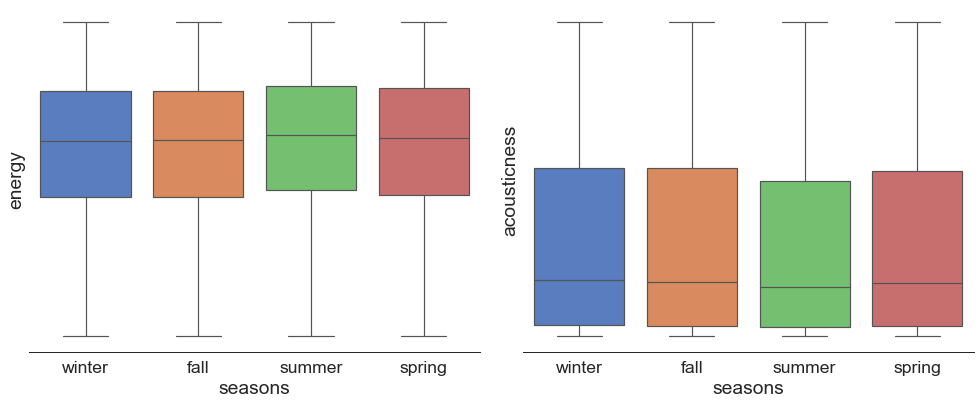

In [22]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("paper", font_scale=2.0)

test = ['energy', 'acousticness']

f, axes = plt.subplots(1,2, figsize=(14, 6))
sns.despine(left=True)

for i in range(0,2):
    var = test[i]
    sns.boxplot(x=data.seasons,y=data[var], ax= axes[i])
    
    
plt.setp(axes, yticks=[])
plt.tight_layout()

In [39]:
# We take a small sample for our statistical testing

dftest = data[['seasons','energy','instrumentalness']].sample(1000)
dftest.sample(2)

,seasons,energy,instrumentalness
7195,spring,0.368,0.000
9100,spring,0.381,0.195


In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


formula = 'energy ~ C(seasons)'
lm = ols(formula, dftest).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

               sum_sq     df         F   PR(>F)
C(seasons)   0.293548    3.0  1.727207  0.15971
Residual    56.425242  996.0       NaN      NaN


In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


formula = 'instrumentalness ~ C(seasons)'
lm = ols(formula, dftest).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

               sum_sq     df         F    PR(>F)
C(seasons)   0.195475    3.0  0.751783  0.521404
Residual    86.325139  996.0       NaN       NaN
